In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
filepath = 'March Belgaum.csv'
data = pd.read_csv(filepath)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Surface_Pressure,Wind_Speed
0,2023,1,25.83,16.58,35.73,5.68,0.0,94.13,2.48
1,2023,2,26.23,18.47,35.61,6.23,0.0,94.18,2.98
2,2023,3,26.15,18.55,35.36,5.80,0.0,94.23,3.22
3,2023,4,26.88,19.65,35.93,5.98,0.0,94.23,3.17
4,2023,5,27.07,19.51,36.21,5.92,0.0,94.16,2.73


In [ ]:
data.shape


(31, 8)

In [ ]:
data.drop(['Surface_Pressure'], axis = 1, inplace = True)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_Speed
0,2023,1,25.83,16.58,35.73,5.68,0.0,2.48
1,2023,2,26.23,18.47,35.61,6.23,0.0,2.98
2,2023,3,26.15,18.55,35.36,5.80,0.0,3.22
3,2023,4,26.88,19.65,35.93,5.98,0.0,3.17
4,2023,5,27.07,19.51,36.21,5.92,0.0,2.73


In [ ]:
# missing columns 
data.isna().sum()

YEAR               0
Date               0
Temperature        0
Min_Temperature    0
Max_Temperature    0
Humidity           0
Precipitation      0
Wind_Speed         0
dtype: int64

In [ ]:
data.describe()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_Speed
count,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2023.0,16.000000,26.310323,18.658710,35.513871,8.542903,0.067097,2.368387
std,0.0,9.092121,1.002585,1.483358,1.478627,2.077691,0.152210,0.525167
min,2023.0,1.000000,23.290000,15.940000,32.080000,5.430000,0.000000,0.840000
25%,2023.0,8.500000,25.880000,17.790000,35.180000,6.380000,0.000000,2.220000
50%,2023.0,16.000000,26.230000,18.480000,35.930000,9.160000,0.000000,2.370000
75%,2023.0,23.500000,26.935000,19.505000,36.355000,10.530000,0.070000,2.620000
max,2023.0,31.000000,28.010000,22.000000,37.910000,12.020000,0.760000,3.220000


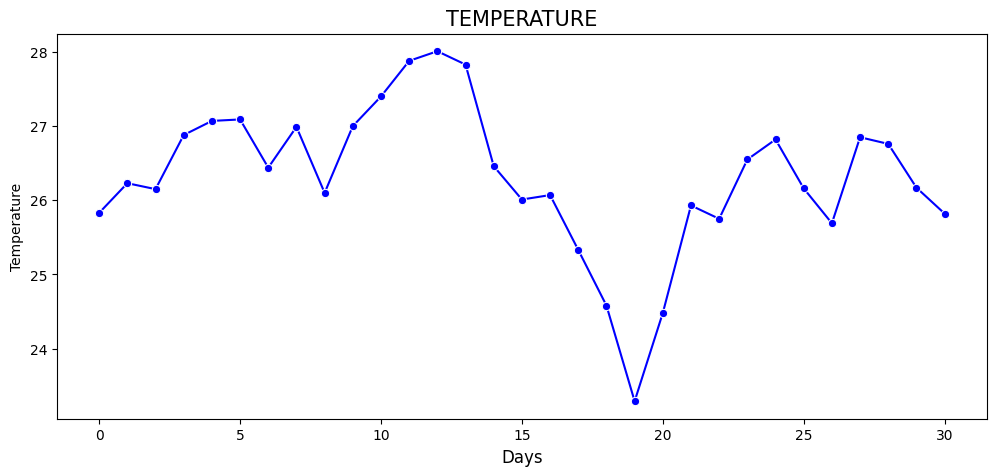

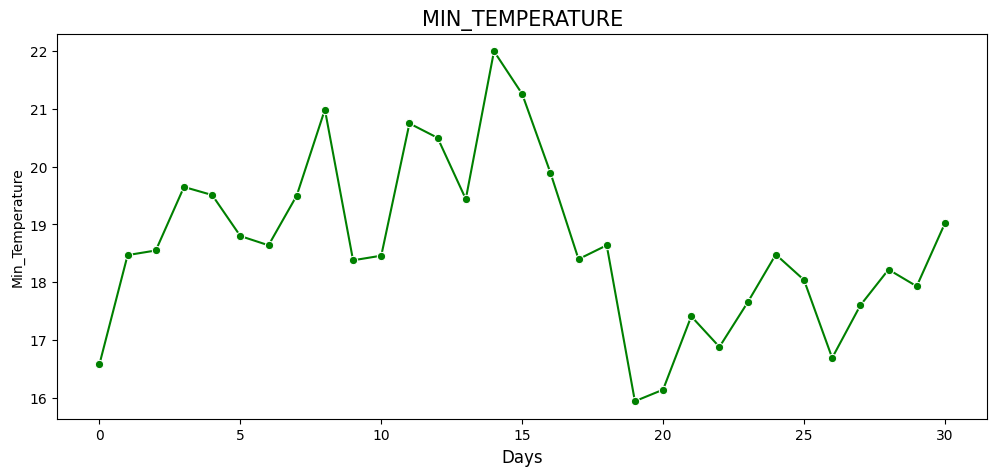

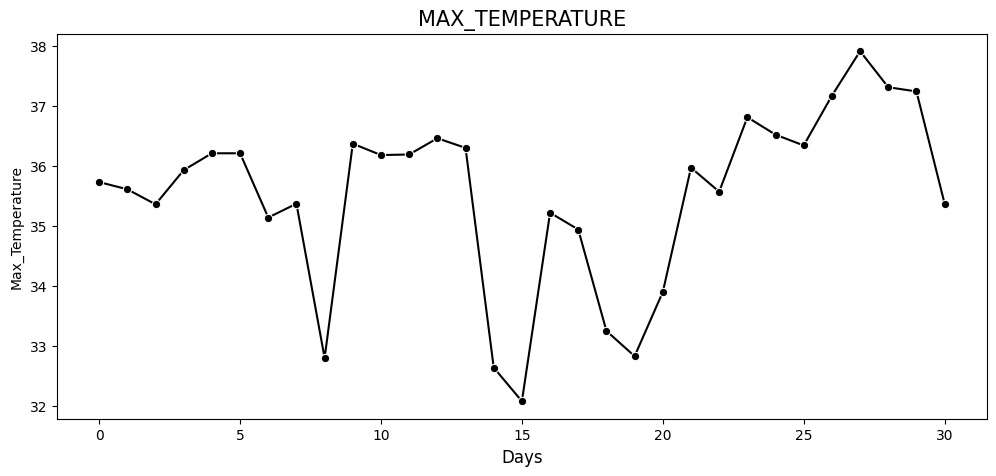

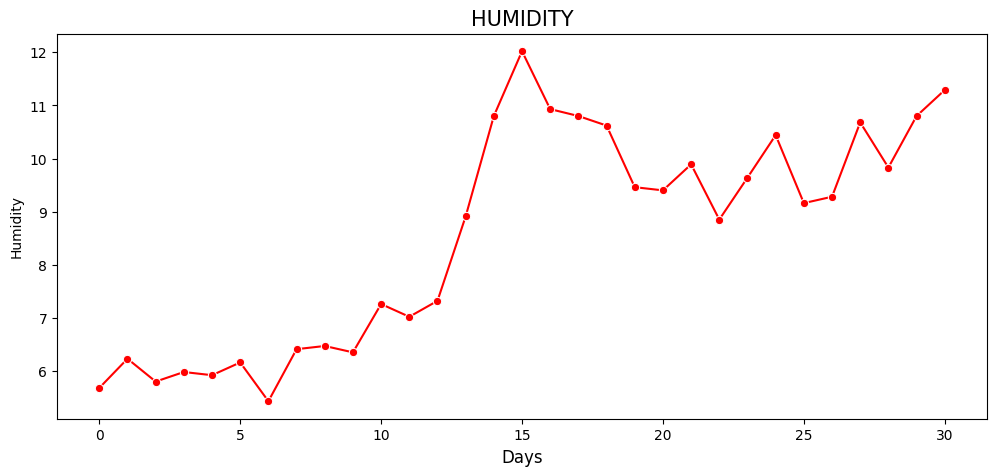

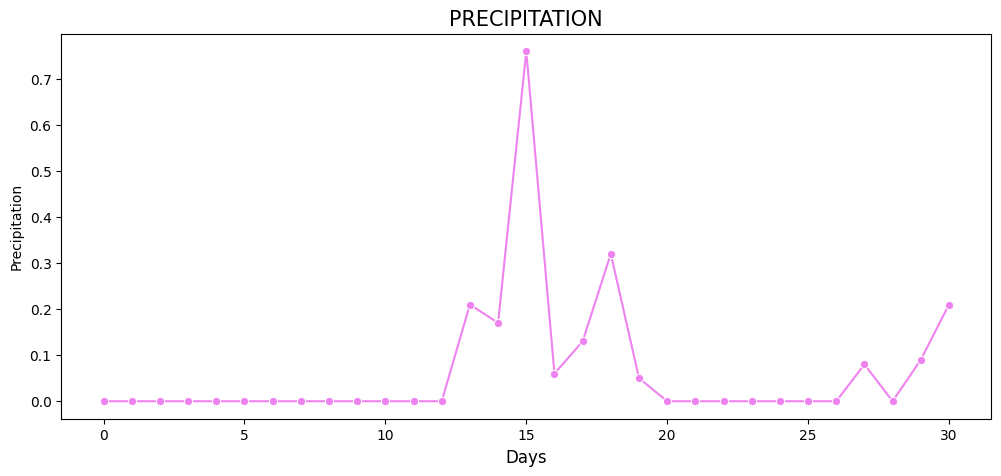

In [ ]:
# Plotting Weather Data
color={2:'blue',3:'green',4:'black',5:'red',6:'violet',7:'orange'}
for index in range(2,7):
    plt.figure(figsize=(12,5))
    plt.xlabel('Days', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

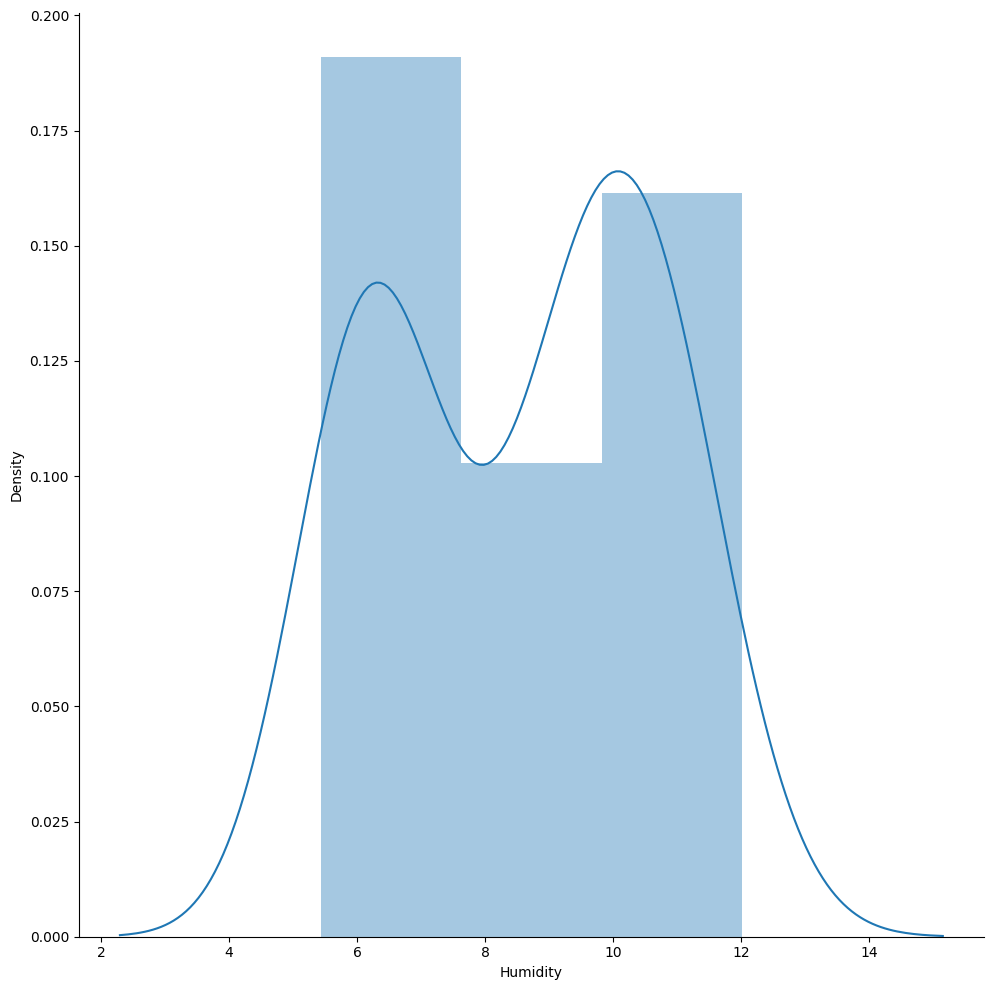

In [ ]:
# For Humidity
sns.FacetGrid(data, height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

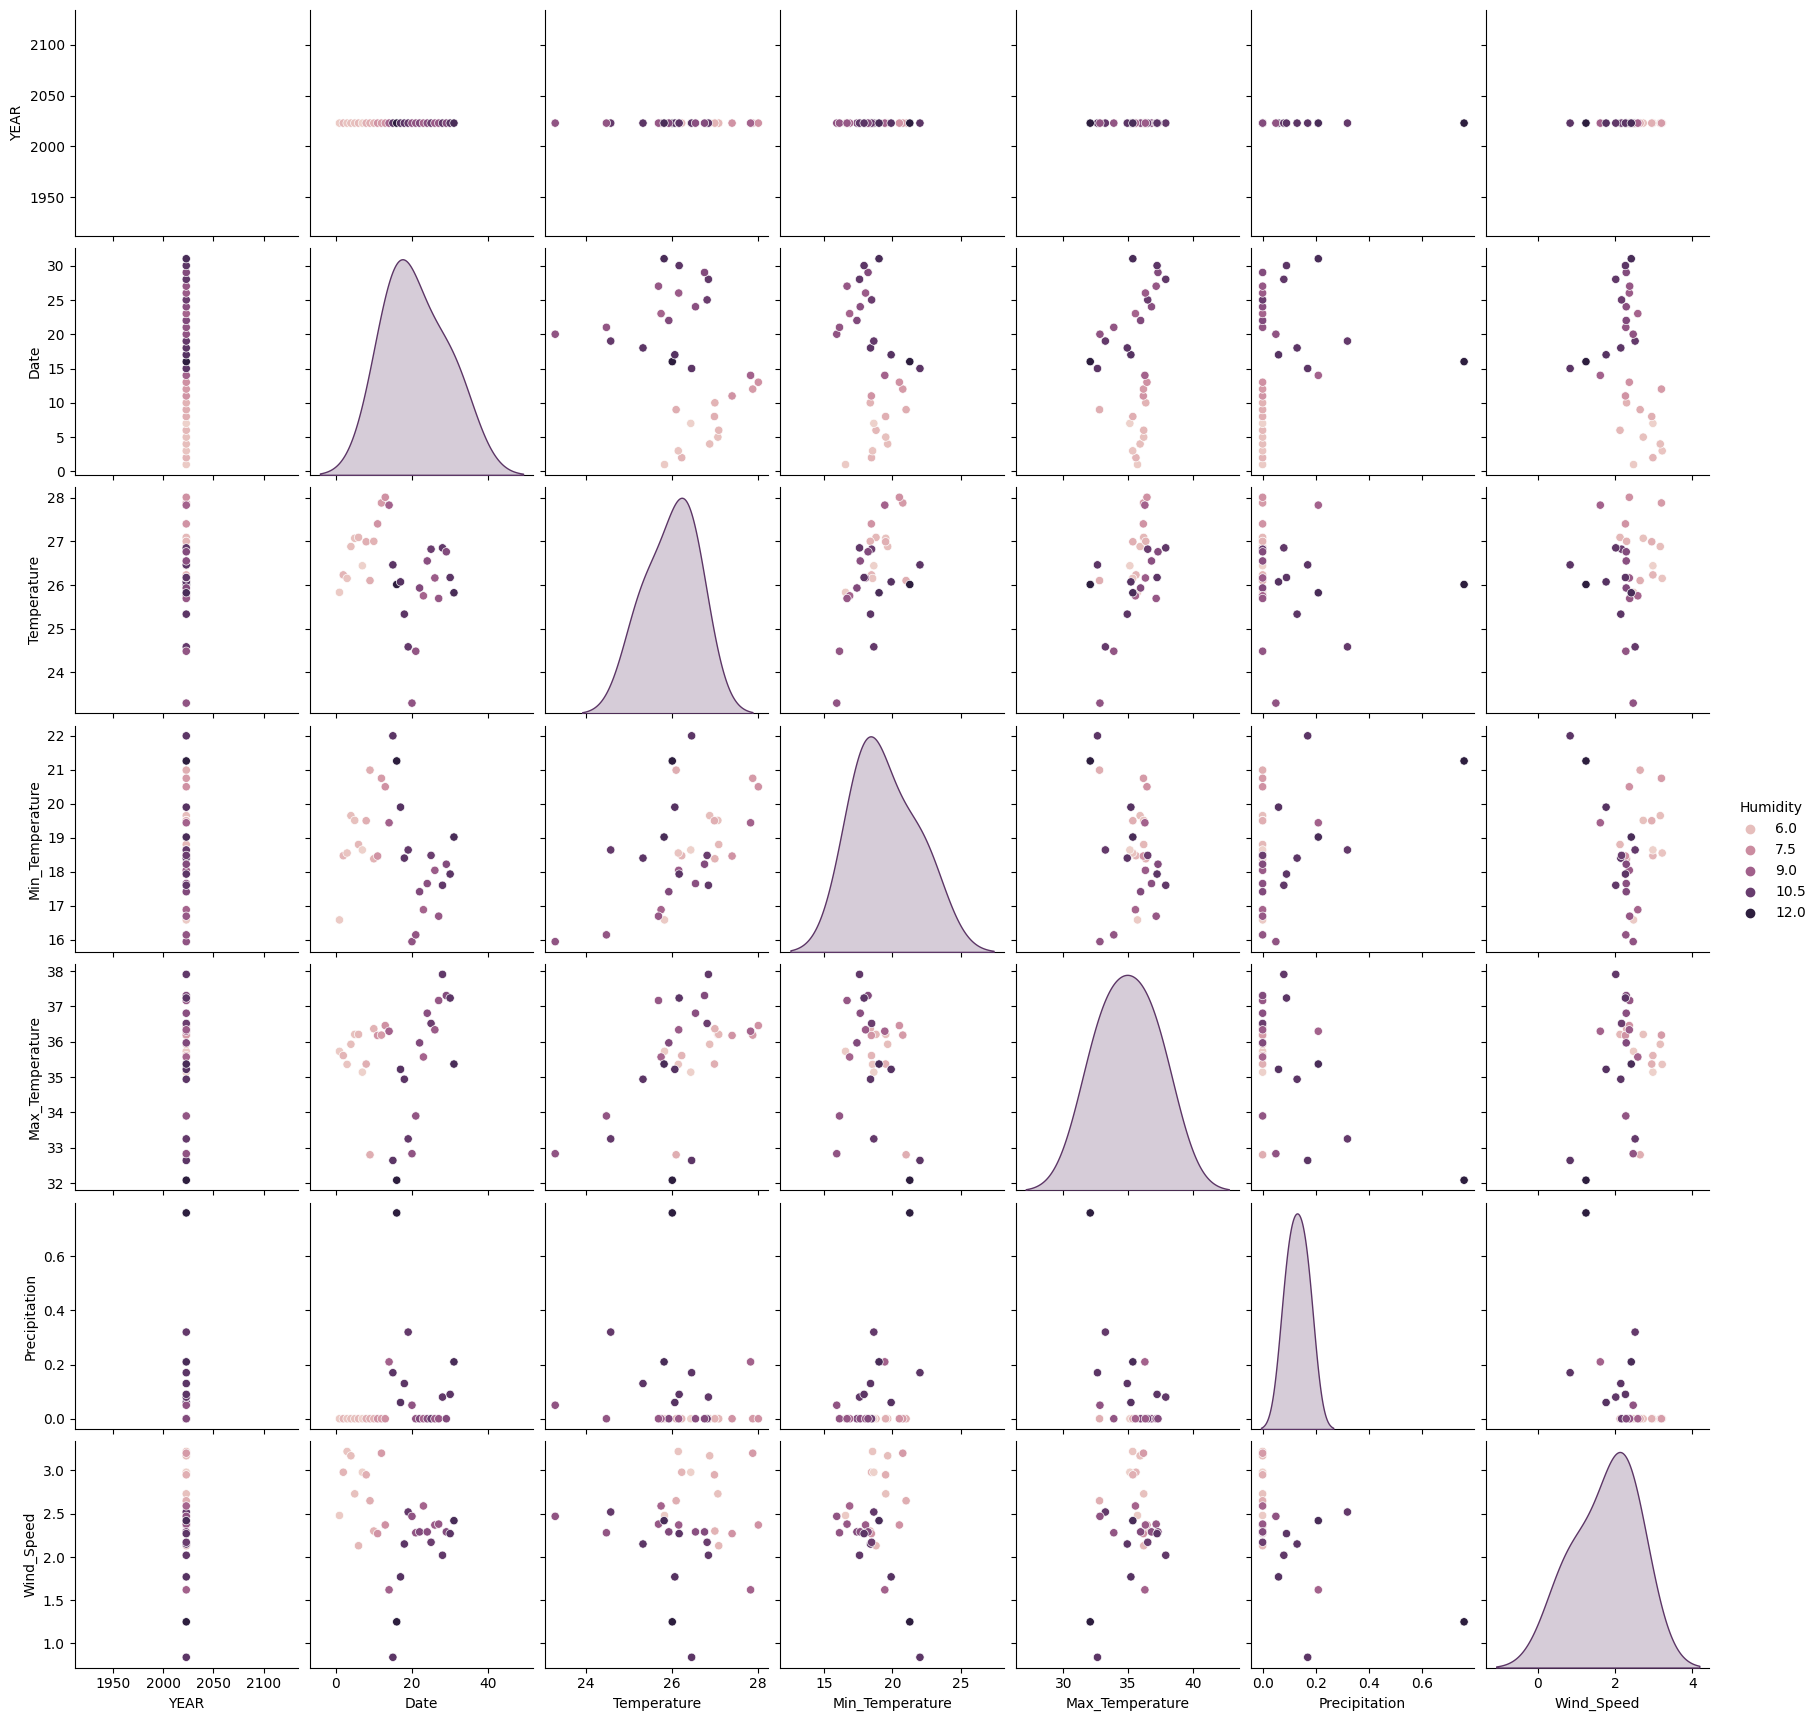

In [ ]:
sns.pairplot(data,hue="Humidity")

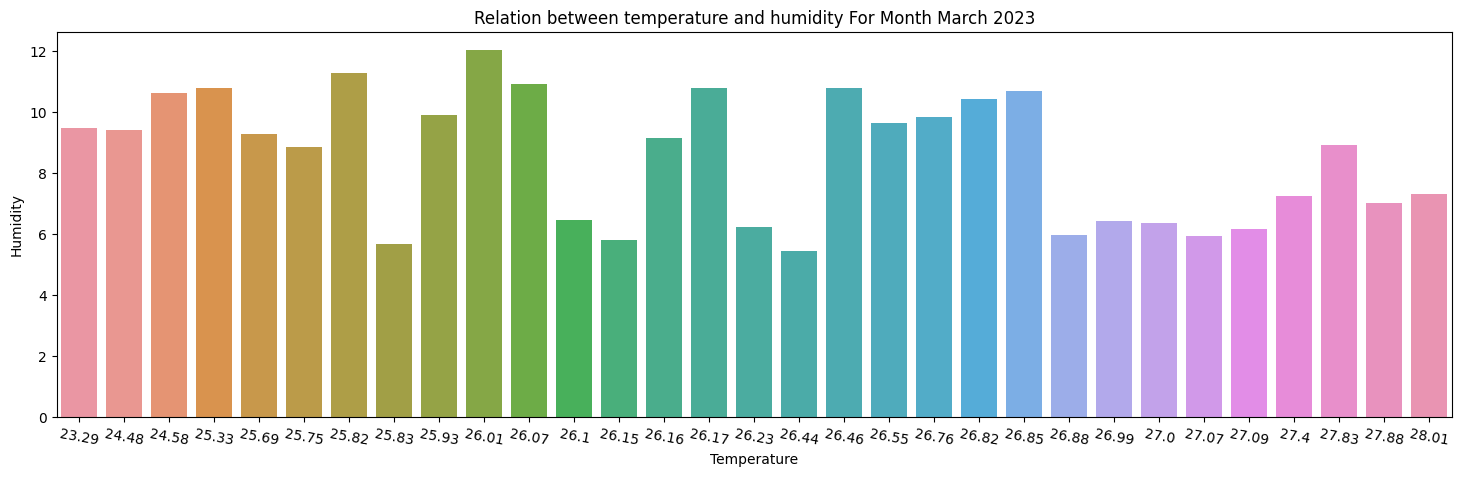

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot(x='Temperature', y='Humidity',data=data)
plt.xticks(rotation=-10)
plt.title('Relation between temperature and humidity For Month March 2023')
plt.show()

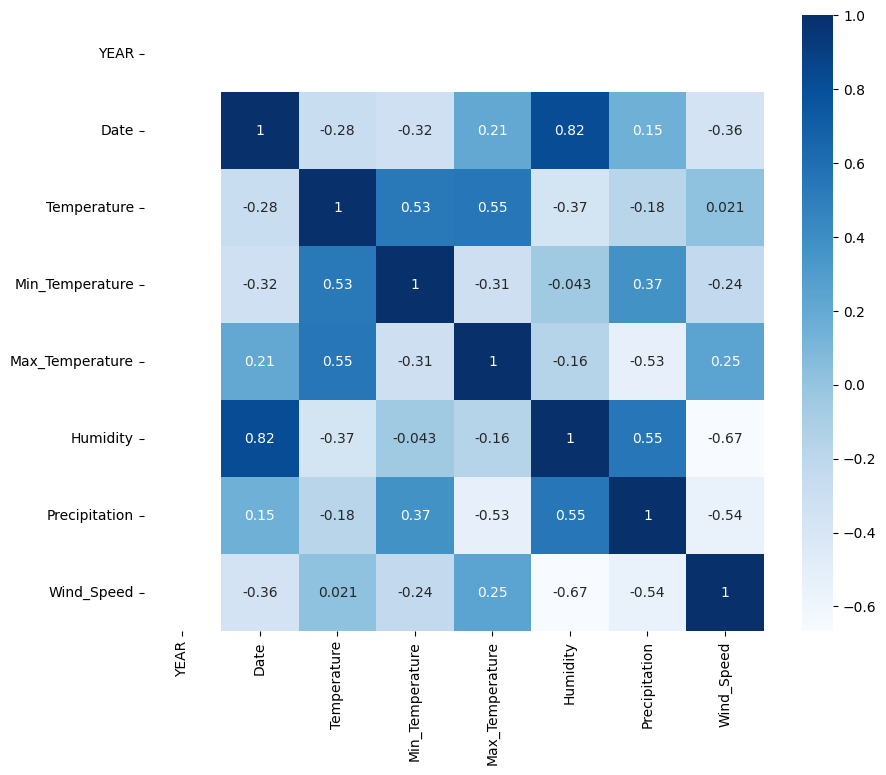

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Blues')
plt.show()

**Humidity** (Create a pivot table to aggregate humidity by date & Heatmap Using Seaborn)

In [ ]:
humidity_table = pd.pivot_table(data, values='Humidity', index=['Date'])
sns.heatmap(data = humidity_table, cmap='Reds')

Temperature

<Axes: ylabel='Date'>

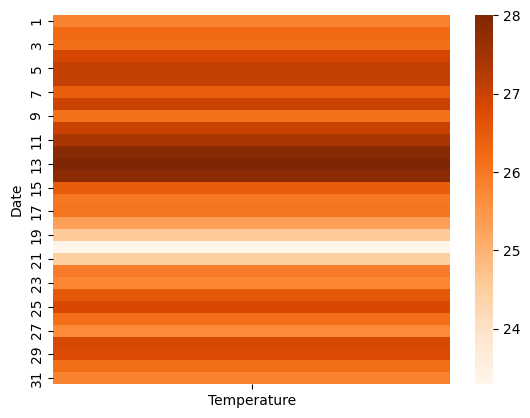

In [ ]:

Temperature_table = pd.pivot_table(data, values='Temperature', index=['Date'])
sns.heatmap(data = Temperature_table, cmap='Oranges')

In [ ]:
indices = ['Temperature', 'Humidity', 'Precipitation','Wind_Speed']
ex_data = data.loc[:,indices]
ex_data

,Temperature,Humidity,Precipitation,Wind_Speed
0,25.83,5.68,0.00,2.48
1,26.23,6.23,0.00,2.98
2,26.15,5.80,0.00,3.22
3,26.88,5.98,0.00,3.17
4,27.07,5.92,0.00,2.73
5,27.09,6.16,0.00,2.13
6,26.44,5.43,0.00,2.98
7,26.99,6.41,0.00,2.95
8,26.10,6.47,0.00,2.65
9,27.00,6.35,0.00,2.30


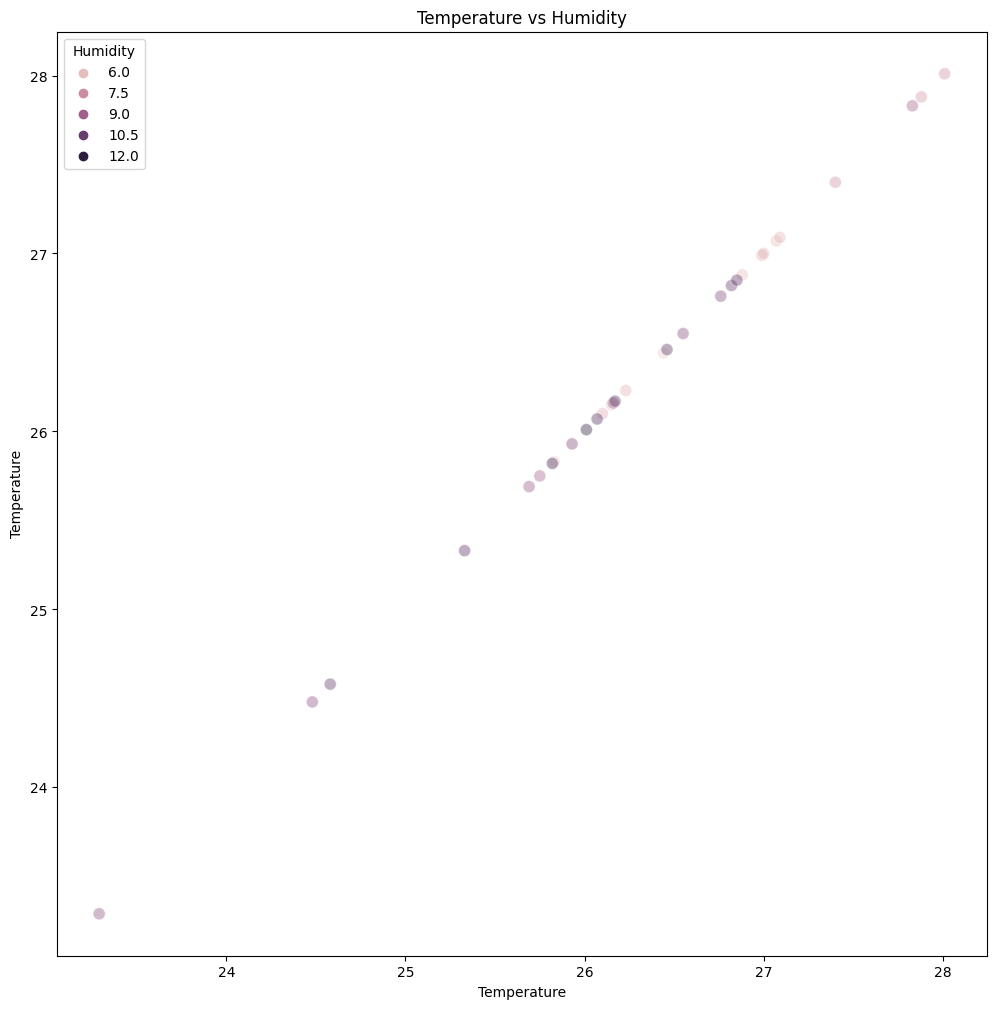

In [ ]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,0], hue= ex_data.iloc[:,1], s=75, alpha = 0.4)
plt.show()

DAYS-WISE ANALYSIS

In [ ]:
#Resampling the data days-wise by mean

indices = [2,3,4,5,6,7]
days = data.iloc[:,1] 

days.head()

0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64

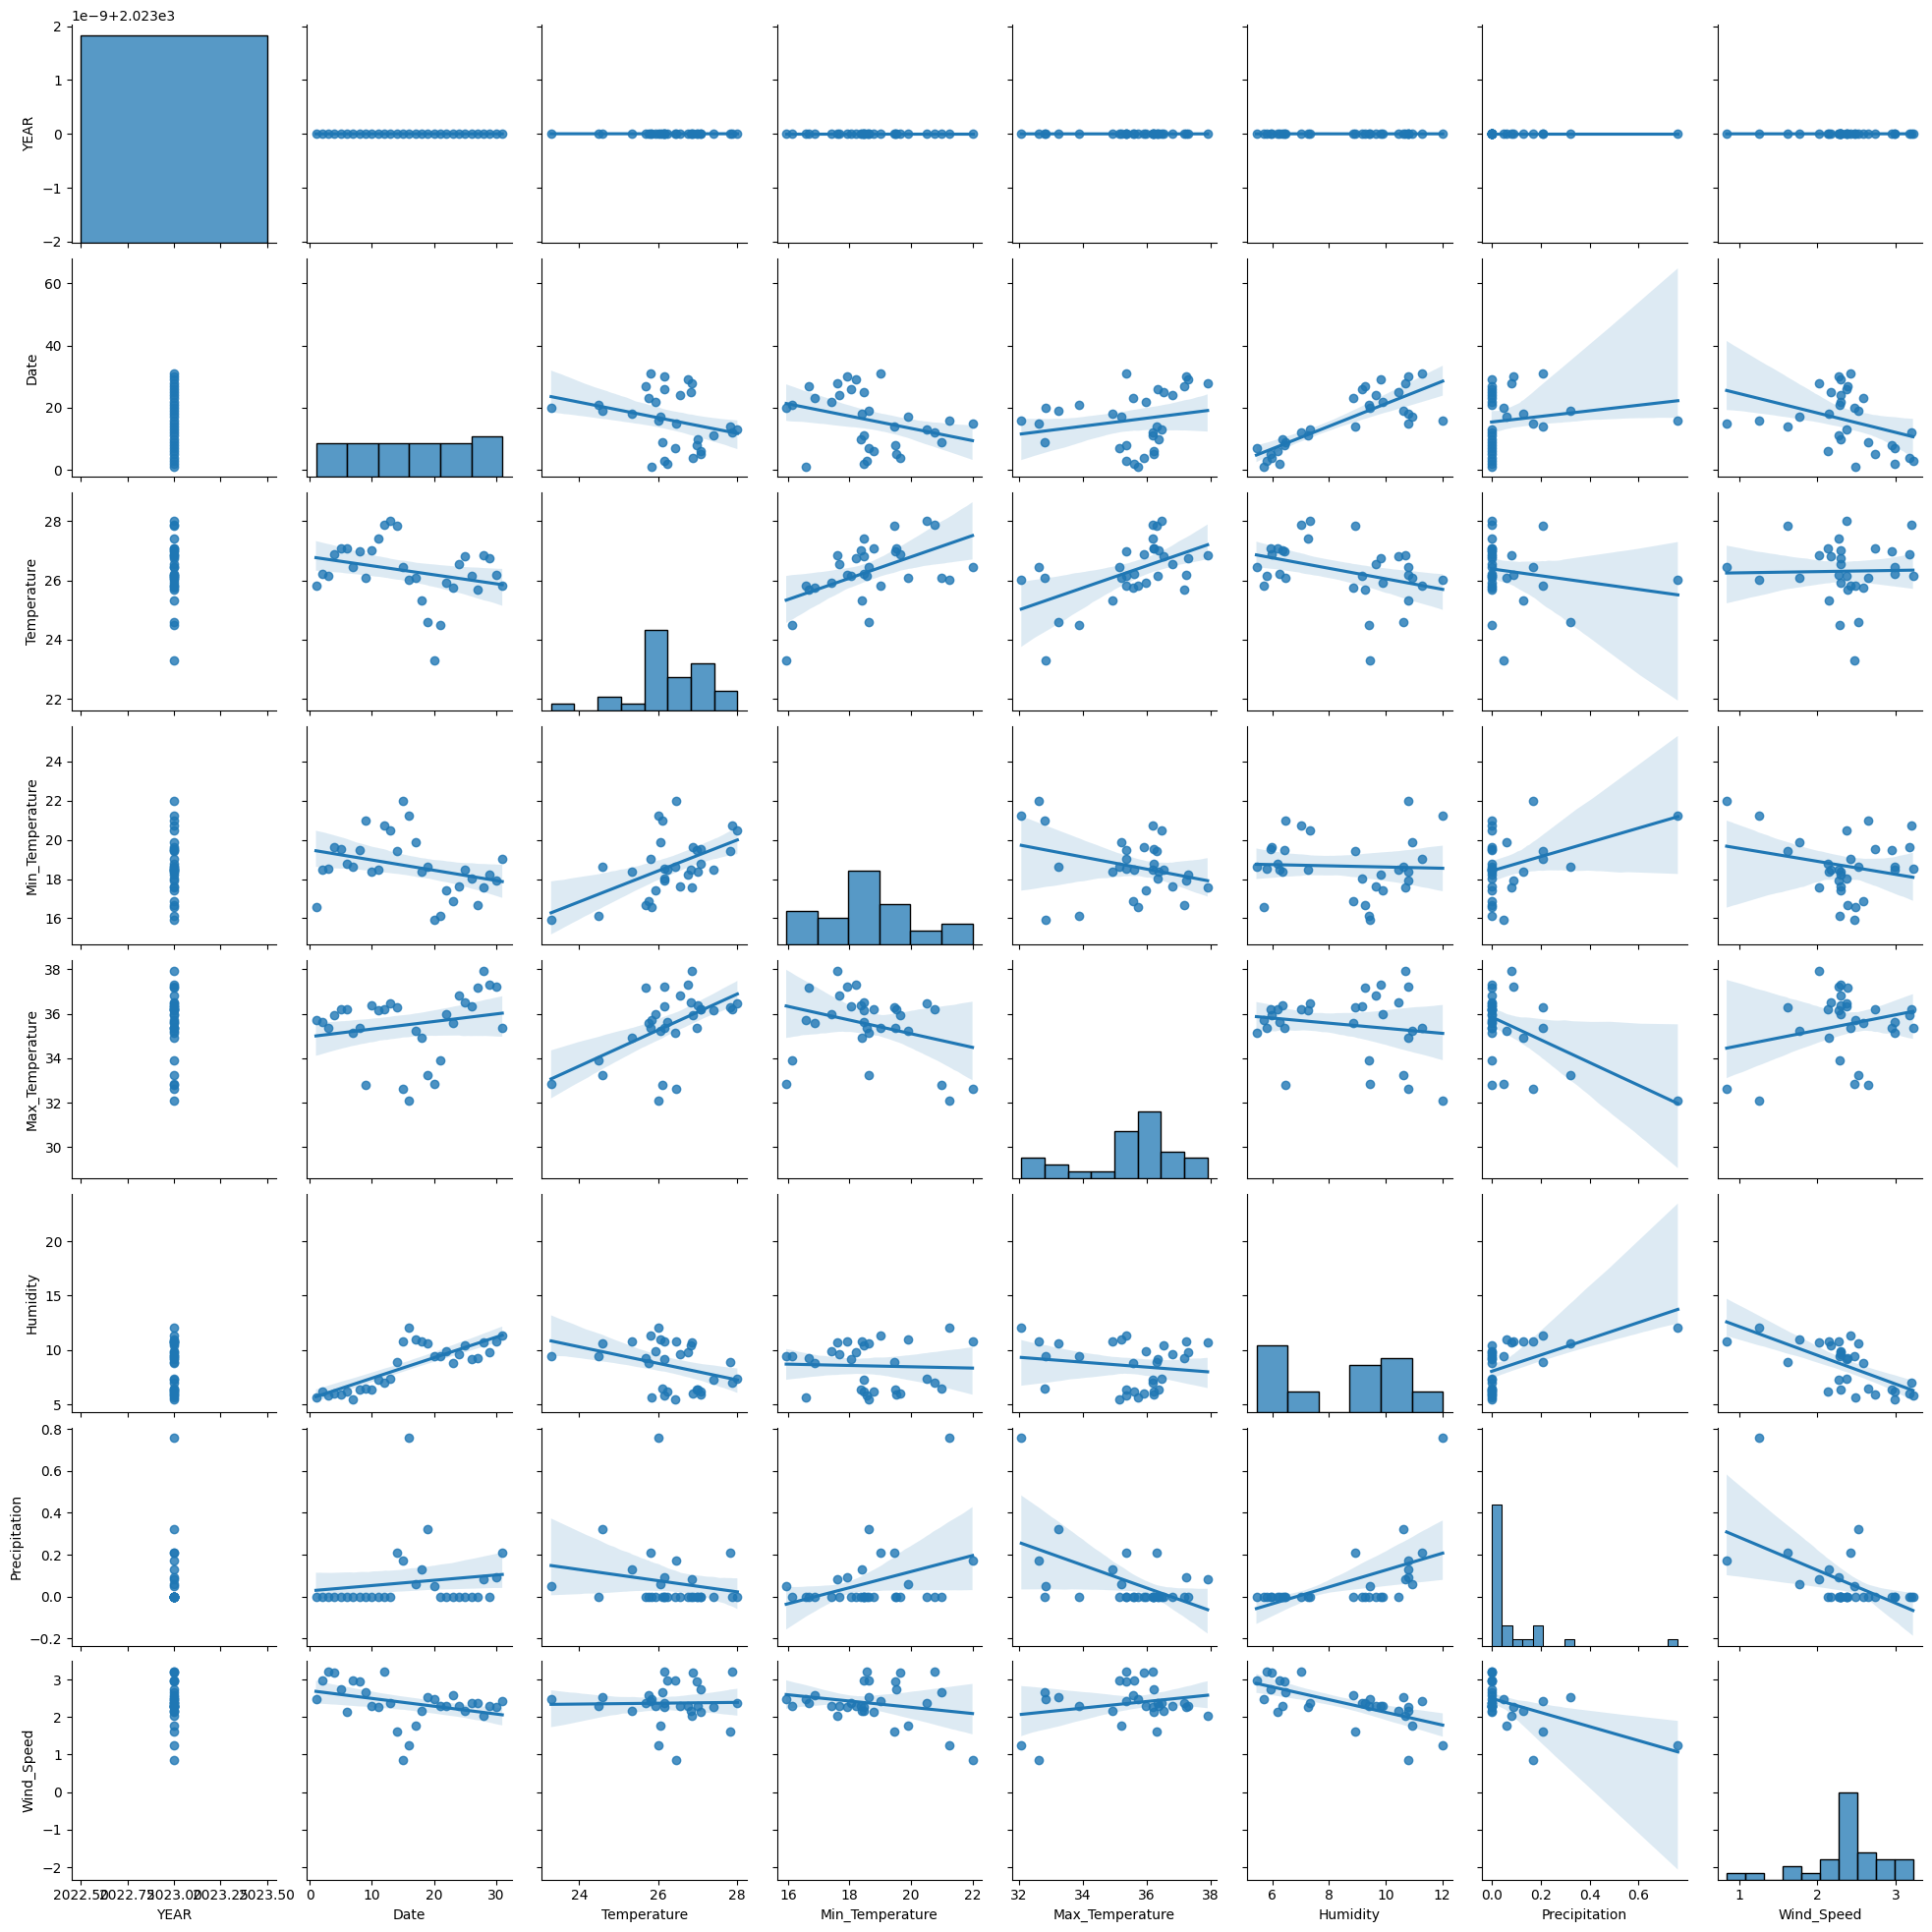

In [ ]:
# Pair plot for correlation
sns.pairplot(data, kind='reg')
plt.show()

In [ ]:
Temperature = data
normed_data = (Temperature  - Temperature.min()) / (Temperature.max() - Temperature.min())

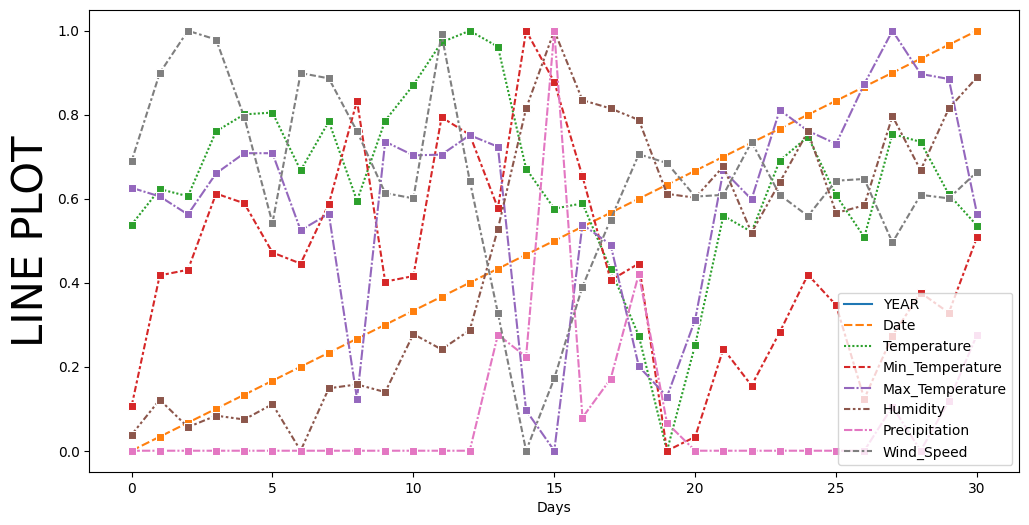

In [ ]:
#Line graph representation
plt.figure(figsize=(12,6))
plt.xlabel('Days')
plt.ylabel('LINE PLOT', fontsize=30)
sns.lineplot(data = normed_data, marker = 's')
plt.show()

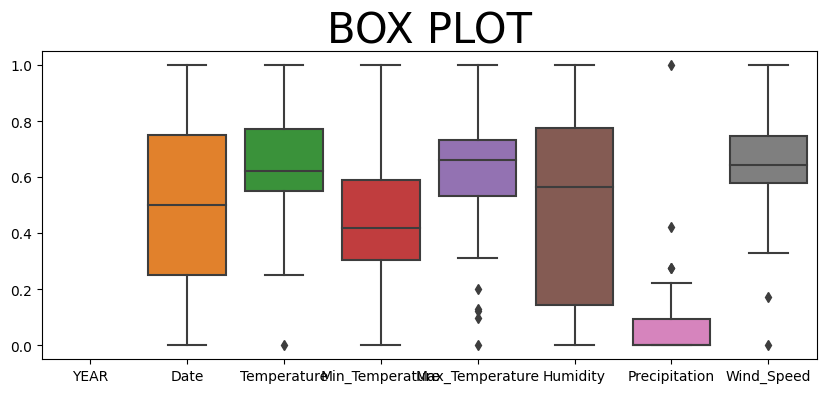

In [ ]:
#Box Plot
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = normed_data)
plt.show()

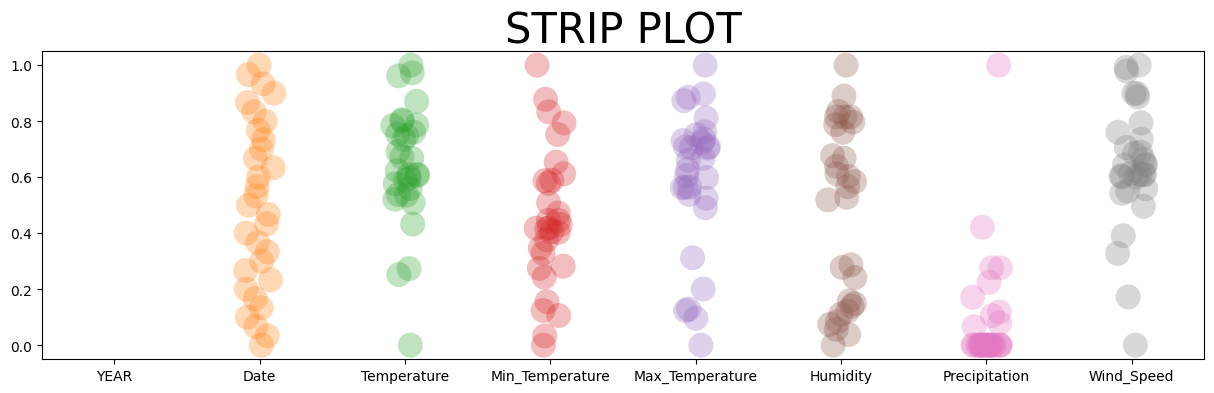

In [ ]:
#Strip Plot
plt.figure(figsize = (15,4))
plt.title('STRIP PLOT', fontsize=30)
sns.stripplot(data=normed_data, jitter= True, s =18, alpha = 0.3)
plt.show()